In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from os import getenv
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv("~~~~")
PLAID_SECRET = os.getenv("~~~~~")
PLAID_PUBLIC_KEY = os.getenv("~~~~~")
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

print(type(PLAID_CLIENT_ID))

<class 'NoneType'>


# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
# {
#    "transactions",
#    "income",
#    "assets"
#}

# url = "https://plaid.com/ins_109508"

client = plaid.Client(client_id = "~~~~~", secret = "~~~~~" , public_key = "~~~~~~", environment='sandbox')

client

# client.Transactions.get(start_date = datetime.date.today(), end_date = datetime.timedelta(-90))

# client.Income.get()

# client.Assets.get()


### 2. Generate a public token

In [6]:
# YOUR CODE HERE


# creating public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE

# exchange public token for access token

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# store access token as access_token
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
# client.Transactions.get(start_date = datetime.date.today(), end_date = datetime.timedelta(-90), access_token = access_token)

# transaction_response = client.Transactions.get(access_token,start_date,end_date)

# income_response = client.Income.get(access_token)


client.Accounts.get(access_token)

{'accounts': [{'account_id': 'Dk8BGdKzwpFANmnPy9wAi711yDeVy1IvwoeZV',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'VEWqmNoygVtZXdvnE1mZsazz98kL9ztWmVkDz',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'wkKq18DX5yF37EBQN9X3iNyym3bZmyFrNp9Q5',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE

# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

transactions = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(transactions)

[
    {
        "account_id": "5Ao5a9zMV3H9LbQkxzZ9uwWW9QdV9WtZwnV6A",
        "account_owner": null,
        "amount": 500,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2019-09-03",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction

### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE

for transactions in transaction_response["transactions"]:
        print(json.dumps(transactions["category"], indent=4, sort_keys=True))

[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Car Service",
    "Ride Share"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Car Service",
    "Ride Share"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Car Service",
    "Ride Share"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "T

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [12]:
# YOUR CODE HERE

trans_date = []
trans_name = []
trans_amount = []
trans_category = []

for transactions in transaction_response["transactions"]:
        trans_date.append(transactions["date"])
        trans_name.append(transactions["name"])
        trans_amount.append(transactions["amount"])
        trans_category.append(transactions["category"][0])
        
        
trans_df = pd.DataFrame()
trans_df["Date"] = trans_date
trans_df["Name"] = trans_name
trans_df["Amount"] = trans_amount
trans_df["Category"] = trans_category

trans_df = pd.DataFrame(list(zip(trans_date, trans_name, trans_amount, trans_category)), 
                columns =["Date","Name","Amount","Category"])
trans_df.head()

,Date,Name,Amount,Category
0,2019-09-03,United Airlines,500.00,Travel
1,2019-09-01,Uber 072515 SF**POOL**,6.33,Travel
2,2019-08-29,Tectra Inc,500.00,Food and Drink
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2019-08-28,KFC,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [13]:
# YOUR CODE HERE
print(f"types before:\n\n{trans_df.dtypes}\n\n")
trans_df["Date"]=pd.to_datetime(trans_df["Date"])
print(f"types after:\n\n{trans_df.dtypes}\n\n")
print(trans_df.index)
trans_df.set_index("Date", inplace = True)
trans_df

types before:

Date         object
Name         object
Amount      float64
Category     object
dtype: object


types after:

Date        datetime64[ns]
Name                object
Amount             float64
Category            object
dtype: object


RangeIndex(start=0, stop=48, step=1)


,Name,Amount,Category
Date,,,
2019-09-03,United Airlines,500.00,Travel
2019-09-01,Uber 072515 SF**POOL**,6.33,Travel
2019-08-29,Tectra Inc,500.00,Food and Drink
2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2019-08-28,KFC,500.00,Food and Drink
2019-08-28,Madison Bicycle Shop,500.00,Shops
2019-08-19,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2019-08-19,Uber 063015 SF**POOL**,5.40,Travel
2019-08-18,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [22]:
# YOUR CODE HERE

income_response = client.Income.get(access_token)
income_response

prev_year_income = income_response['income']['last_year_income_before_tax']
current_monthly_income = income_response['income']['income_streams'][0]['monthly_income']
projected_yearly_income = income_response['income']['projected_yearly_income_before_tax']

print(f"Previous year's gross income: ${prev_year_income}")
print(f"Current monthly income: ${current_monthly_income}")
print(f"Projected yearly income: ${projected_yearly_income}")

Previous year's gross income: $7285
Current monthly income: $500
Projected yearly income: $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1104c6c50>],
      dtype=object)

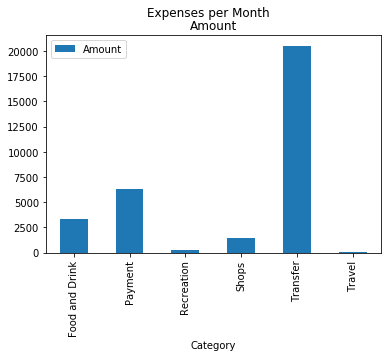

In [23]:
# YOUR CODE HERE
expenses_per_category = trans_df.groupby("Category").sum()
expenses_per_category 

expenses_per_category.plot(kind="bar",subplots=True, title = "Expenses per Month")


### Calculate the expenses per month

In [17]:
# YOUR CODE HERE

expenses_per_month = trans_df.groupby(trans_df.index.month).sum()
expenses_per_month

,Amount
Date,
6,10138.91
7,10645.24
8,10645.24
9,506.33


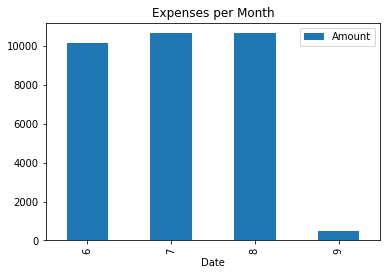

In [19]:
expenses_per_month.plot(kind="bar", title = "Expenses per Month")

In [20]:
print(trans_df)

                                             Name   Amount        Category
Date                                                                      
2019-09-03                        United Airlines   500.00          Travel
2019-09-01                 Uber 072515 SF**POOL**     6.33          Travel
2019-08-29                             Tectra Inc   500.00  Food and Drink
2019-08-28              AUTOMATIC PAYMENT - THANK  2078.50         Payment
2019-08-28                                    KFC   500.00  Food and Drink
2019-08-28                   Madison Bicycle Shop   500.00           Shops
2019-08-19           CREDIT CARD 3333 PAYMENT *//    25.00         Payment
2019-08-19                 Uber 063015 SF**POOL**     5.40          Travel
2019-08-18  ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
2019-08-18                   CD DEPOSIT .INITIAL.  1000.00        Transfer
2019-08-17                    Touchstone Climbing    78.50      Recreation
2019-08-17               